## imports

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from pycaret.classification import *

## datasets

In [151]:
train = pd.read_csv('data/train.csv)
test = pd.read_csv('data/test.csv')

## descrição dos dados

In [152]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [154]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [155]:
# Renomeando colunas

train.rename(columns = {'Fare' : 'Price', 'SibSp' : 'Relative', 'Pclass':'CostClass', 'Parch':'Family'}, inplace = True)

## Visualização

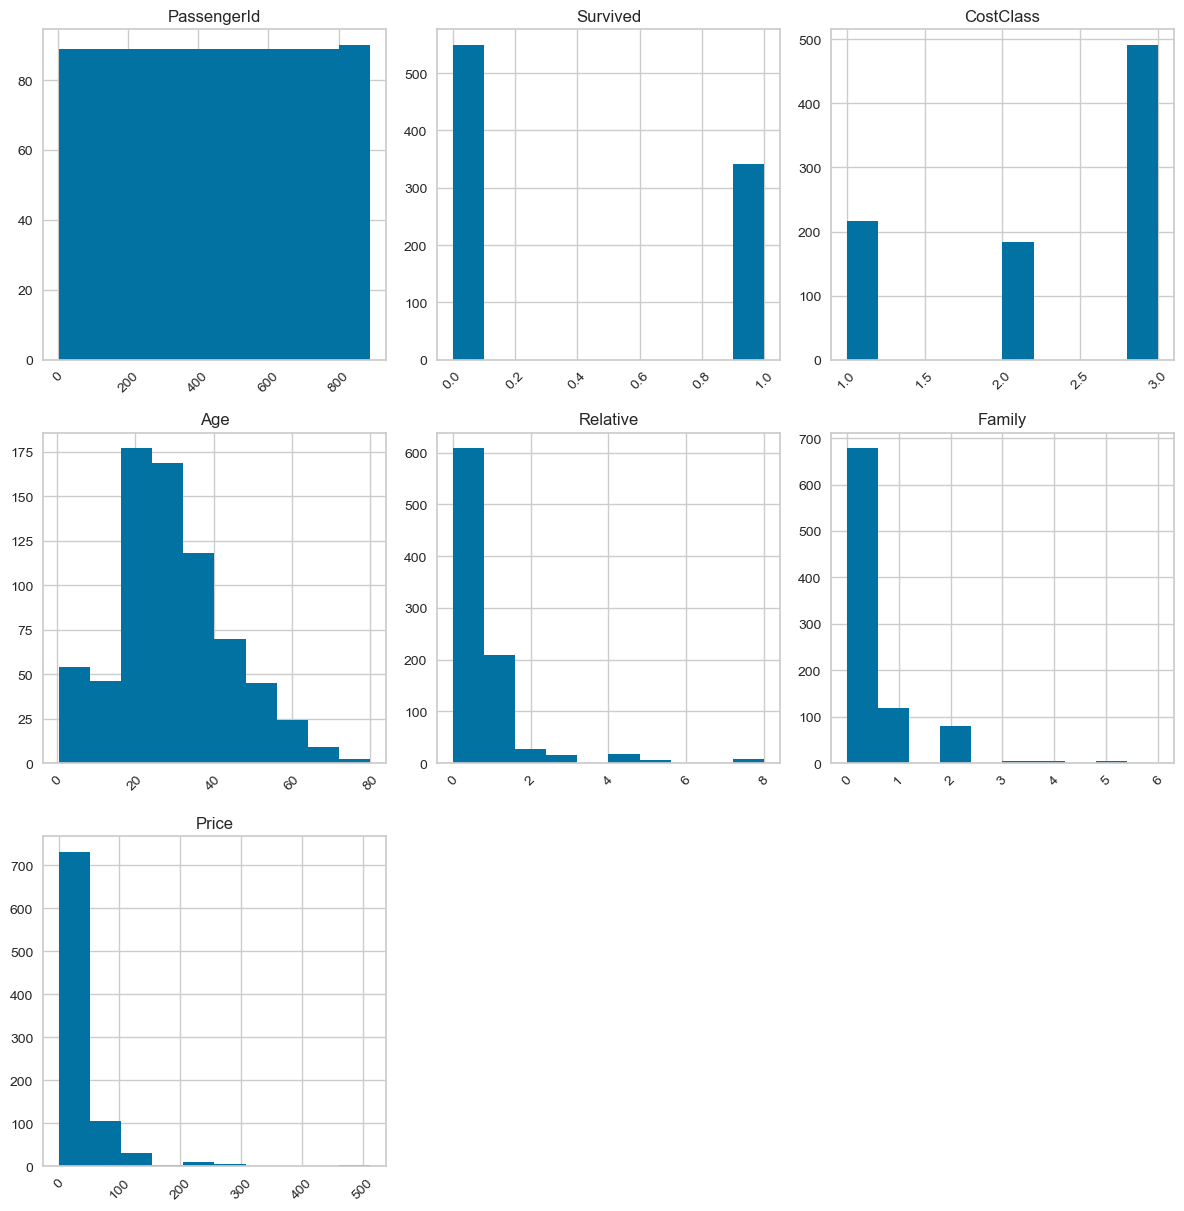

In [156]:
lista_colunas = list(train.select_dtypes(include='number').columns)

plt.figure(figsize = (12, 20))

for i in range(len(lista_colunas)):
    plt.subplot(5, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.xticks(rotation = 45)
    plt.hist(train[lista_colunas[i]])
    
plt.tight_layout()

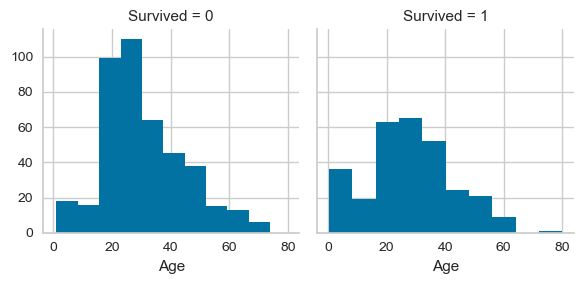

In [157]:
graph = sns.FacetGrid(train, col = 'Survived')
graph.map(plt.hist, 'Age', bins = 10)

<AxesSubplot:xlabel='Survived', ylabel='count'>

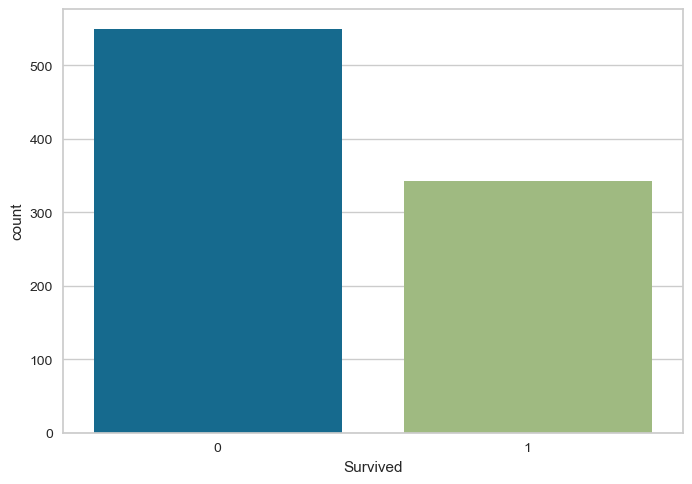

In [158]:
sns.countplot(x = train['Survived'])

In [159]:
mulheres = train.loc[train['Sex'] == 'female']["Survived"]
percentual_mulheres_sobreviveu = sum(mulheres) / len(mulheres)

homens = train.loc[train['Sex'] == 'male']["Survived"]
percentual_homens_sobreviveu = sum(homens) / len(homens)

print(f'Mulheres sobreviventes: {percentual_mulheres_sobreviveu:.2f}')
print(f'Homens sobreviventes: {percentual_homens_sobreviveu:.2f}')

Mulheres sobreviventes: 0.74
Homens sobreviventes: 0.19


<AxesSubplot:xlabel='Sex'>

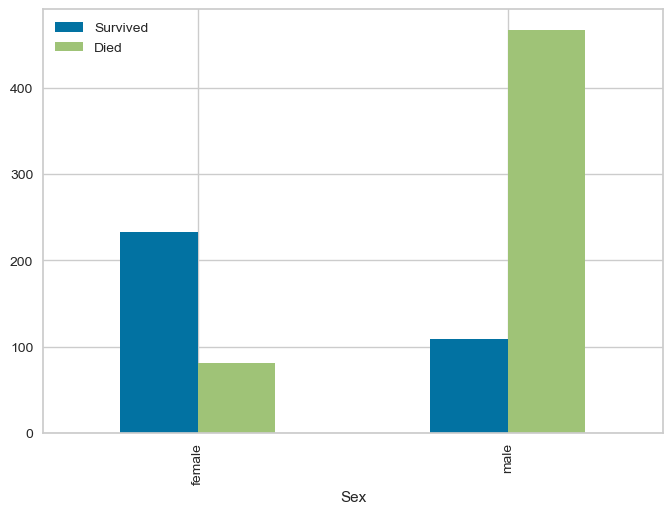

In [160]:
train['Died'] = 1 - train['Survived']

train.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind = 'bar')

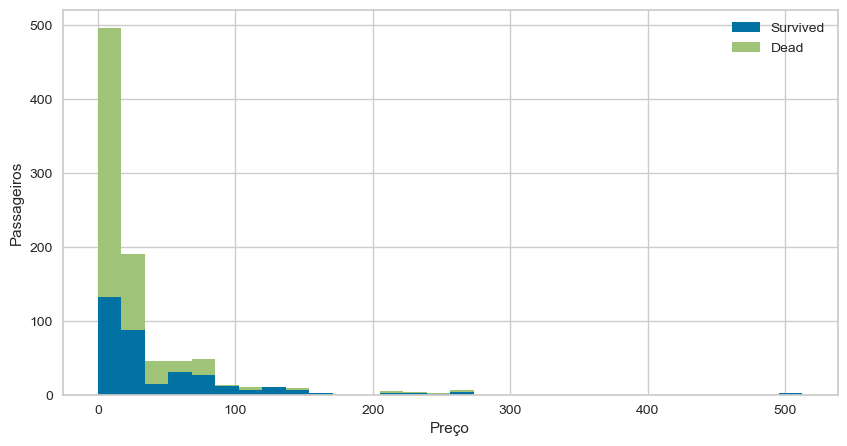

In [161]:
plt.figure(figsize = (10, 5))

plt.hist([train[train['Survived'] == 1]['Price'], train[train['Survived'] == 0]['Price']], 
          stacked = True, bins = 30, label = ['Survived','Dead'])

plt.xlabel('Preço')
plt.ylabel('Passageiros')
plt.legend()

## tratamento (train)

In [162]:
train.head()

,PassengerId,Survived,CostClass,Name,Sex,Age,Relative,Family,Ticket,Price,Cabin,Embarked,Died
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [163]:
train.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Died'], axis = 1, inplace = True)

In [164]:
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1})
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2,'nan':'NaN'})

media_idade_homem = train[train['Sex'] == 1]['Age'].median()
media_idade_mulher = train[train['Sex'] == 0]['Age'].median()

train.loc[(train['Age'].isna()) & (train['Sex'] == 0),'Age'] = media_idade_homem
train.loc[(train['Age'].isna()) & (train['Sex'] == 1),'Age'] = media_idade_mulher

In [165]:
train.isna().sum()

Survived     0
CostClass    0
Sex          0
Age          0
Relative     0
Family       0
Price        0
Embarked     2
dtype: int64

In [166]:
train.dropna(inplace = True)

In [167]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   889 non-null    int64  
 1   CostClass  889 non-null    int64  
 2   Sex        889 non-null    int64  
 3   Age        889 non-null    float64
 4   Relative   889 non-null    int64  
 5   Family     889 non-null    int64  
 6   Price      889 non-null    float64
 7   Embarked   889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 62.5+ KB


## dados de treino e teste

In [168]:
X = train.drop('Survived', axis = 1)
y = train['Survived']

In [169]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.20, random_state = 0, stratify = y)

## Balanceando os dados

In [170]:
smt = SMOTE(random_state = 0)

xtrain_res, ytrain_res = smt.fit_resample(xtrain, ytrain)

print(f'Distribuição ANTES do balanceamento:\n{ytrain.value_counts()}')
print()
print(f'Distribuição DEPOIS do balanceamento:\n{ytrain_res.value_counts()}')

Distribuição ANTES do balanceamento:
0    439
1    272
Name: Survived, dtype: int64

Distribuição DEPOIS do balanceamento:
1    439
0    439
Name: Survived, dtype: int64


## Comparando modelos

In [171]:
# juntando
train_dados = pd.concat([xtrain_res, ytrain_res], axis = 1)
# pycaret
s = setup(data = train_dados, target = 'Survived', session_id = 0, normalize = True)

,Description,Value
0,Session id,0
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(878, 8)"
4,Transformed data shape,"(878, 8)"
5,Transformed train set shape,"(614, 8)"
6,Transformed test set shape,"(264, 8)"
7,Numeric features,6
8,Categorical features,1
9,Preprocess,True


In [172]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8338,0.8987,0.8144,0.8502,0.8296,0.6678,0.6720,0.2020
xgboost,Extreme Gradient Boosting,0.8176,0.8941,0.8012,0.8319,0.8133,0.6352,0.6400,0.0800
rf,Random Forest Classifier,0.8127,0.8973,0.8140,0.8133,0.8114,0.6253,0.6288,0.1270
et,Extra Trees Classifier,0.8078,0.8835,0.8237,0.8000,0.8094,0.6157,0.6198,0.1270
gbc,Gradient Boosting Classifier,0.8045,0.8888,0.7689,0.8309,0.7955,0.6092,0.6149,0.0970
knn,K Neighbors Classifier,0.7915,0.8538,0.8042,0.7854,0.7924,0.5828,0.5867,0.0520
dt,Decision Tree Classifier,0.7787,0.7862,0.7753,0.7871,0.7782,0.5573,0.5617,0.0470
ada,Ada Boost Classifier,0.7784,0.8448,0.7916,0.7765,0.7812,0.5574,0.5617,0.0940
qda,Quadratic Discriminant Analysis,0.7768,0.8249,0.7488,0.7954,0.7690,0.5535,0.5577,0.0490
ridge,Ridge Classifier,0.7767,0.0000,0.7654,0.7863,0.7731,0.5537,0.5577,0.0380


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [173]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8871,0.9553,0.9677,0.8333,0.8955,0.7742,0.7845
1,0.7903,0.8512,0.7419,0.8214,0.7797,0.5806,0.5834
2,0.8548,0.9089,0.7742,0.9231,0.8421,0.7097,0.7191
3,0.8226,0.8481,0.8065,0.8333,0.8197,0.6452,0.6455
4,0.8525,0.8935,0.8000,0.8889,0.8421,0.7044,0.7078
5,0.8033,0.8763,0.8667,0.7647,0.8125,0.6073,0.6126
6,0.8197,0.9296,0.8000,0.8276,0.8136,0.6391,0.6394
7,0.7869,0.8505,0.7097,0.8462,0.7719,0.5748,0.5826
8,0.8525,0.9527,0.8387,0.8667,0.8525,0.7050,0.7054


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predições com train

In [174]:
preds_train = predict_model(lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7917,0.8709,0.8485,0.7619,0.8029,0.5833,0.5871


In [175]:
preds_train

,CostClass,Sex,Age,Relative,Family,Price,Embarked,Survived,prediction_label,prediction_score
614,3,1,9.000000,4,2,31.275000,0.0,0,0,0.9870
615,1,0,36.180538,1,0,52.666016,0.0,1,1,0.9575
616,3,1,5.000000,0,0,12.475000,0.0,1,1,0.7799
617,2,1,40.000000,0,0,15.750000,0.0,1,1,0.9746
618,3,1,29.000000,1,0,23.628067,2.0,1,1,0.9615
...,...,...,...,...,...,...,...,...,...,...
873,1,1,56.550762,0,0,82.069405,1.0,1,1,0.9826
874,3,1,1.000000,1,1,11.133300,0.0,1,1,0.7468
875,3,0,27.000000,0,0,7.312500,0.0,0,0,0.9030
876,1,0,47.000000,0,0,34.020802,0.0,0,0,0.7215


# test (dataset)

In [176]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [177]:
test.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis = 1, inplace = True)

In [178]:
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2,'nan':'NaN'})

media_idade_homem = test[test['Sex'] == 1]['Age'].median()
media_idade_mulher = test[test['Sex'] == 0]['Age'].median()

test.loc[(test['Age'].isna()) & (test['Sex'] == 0),'Age'] = media_idade_homem
test.loc[(test['Age'].isna()) & (test['Sex'] == 1),'Age'] = media_idade_mulher

In [179]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [180]:
test.dropna(inplace = True)

In [181]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    417 non-null    int64  
 1   Sex       417 non-null    int64  
 2   Age       417 non-null    float64
 3   SibSp     417 non-null    int64  
 4   Parch     417 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  417 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 26.1+ KB


## Comparando modelos

In [183]:
# pycaret
s = setup(data = test, session_id = 0, normalize = True)

,Description,Value
0,Session id,0
1,Target,Embarked
2,Target type,Multiclass
3,Original data shape,"(417, 7)"
4,Transformed data shape,"(417, 7)"
5,Transformed train set shape,"(291, 7)"
6,Transformed test set shape,"(126, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [184]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8148,0.8821,0.8148,0.8103,0.8030,0.6196,0.6288,0.0660
gbc,Gradient Boosting Classifier,0.8043,0.8796,0.8043,0.8058,0.7940,0.6101,0.6205,0.2530
lightgbm,Light Gradient Boosting Machine,0.7769,0.8664,0.7769,0.7927,0.7732,0.5553,0.5618,0.0560
dt,Decision Tree Classifier,0.7731,0.7922,0.7731,0.7900,0.7721,0.5688,0.5767,0.0300
rf,Random Forest Classifier,0.7495,0.8349,0.7495,0.7457,0.7384,0.4899,0.4958,0.1800
knn,K Neighbors Classifier,0.7086,0.7183,0.7086,0.7118,0.6852,0.3762,0.3969,0.0420
et,Extra Trees Classifier,0.6774,0.7647,0.6774,0.6799,0.6689,0.3573,0.3630,0.1670
lda,Linear Discriminant Analysis,0.6733,0.6611,0.6733,0.5747,0.5933,0.1668,0.2148,0.0290
lr,Logistic Regression,0.6529,0.6633,0.6529,0.5566,0.5631,0.0966,0.1424,0.0330
ridge,Ridge Classifier,0.6528,0.0000,0.6528,0.5328,0.5519,0.0747,0.1079,0.0260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [185]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.7889,0.7000,0.7130,0.6865,0.3617,0.3705
1,0.8621,0.9325,0.8621,0.8662,0.8581,0.7056,0.7132
2,0.8276,0.9104,0.8276,0.8155,0.8195,0.6429,0.6450
3,0.8966,0.8959,0.8966,0.9086,0.8946,0.7899,0.7959
4,0.7586,0.8072,0.7586,0.7304,0.7345,0.4741,0.4889
5,0.7586,0.8683,0.7586,0.8132,0.7586,0.5365,0.5517
6,0.9310,0.9341,0.9310,0.9376,0.9280,0.8528,0.8620
7,0.7931,0.8837,0.7931,0.7868,0.7887,0.5756,0.5773
8,0.7586,0.9276,0.7586,0.6590,0.7020,0.5268,0.5453


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Predições

In [186]:
preds_test = predict_model(xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.8492,0.8843,0.8492,0.8493,0.8472,0.6953,0.6976


In [187]:
preds_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,prediction_label,prediction_score
291,3,0,27.0,0,0,7.895800,1,0,0.9973
292,3,0,25.0,0,0,7.925000,0,0,0.9984
293,1,1,76.0,1,0,78.849998,0,0,0.6485
294,1,1,55.0,0,0,27.720800,1,1,0.9471
295,3,1,19.0,1,1,15.741700,1,0,0.9802
...,...,...,...,...,...,...,...,...,...
412,3,1,27.0,0,0,7.720800,2,2,0.9991
413,1,0,24.0,1,0,82.266701,0,0,0.9647
414,2,1,24.0,1,0,27.720800,1,0,0.9034
415,2,0,47.0,0,0,10.500000,0,0,0.9846


_